In [2]:
# notebooks/02_sentiment_thematic_analysis.ipynb
# 1. Import necessary libraries
import pandas as pd
import os
import sys

# Add the 'scripts' directory to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir, 'scripts')))
from analyze_reviews import perform_sentiment_analysis, perform_thematic_analysis
from scripts.utils import preprocess_text # For manual checks if needed


In [ ]:
# 2. Define input/output paths
processed_data_dir = os.path.join(os.path.abspath(''), os.pardir, 'data', 'processed')
input_filepath = os.path.join(processed_data_dir, 'fintech_app_reviews_processed.csv')
output_filepath = os.path.join(processed_data_dir, 'fintech_app_reviews_analyzed.csv')

In [4]:
# 3. Load the preprocessed data
if not os.path.exists(input_filepath):
    print(f"Error: Processed data file not found at {input_filepath}. Please run 01_data_scraping.ipynb first.")
else:
    df = pd.read_csv(input_filepath)
    print(f"Loaded {len(df)} reviews from {input_filepath}")
    
    # Ensure 'reviewId' is treated as string to avoid merge issues later
    df['reviewId'] = df['reviewId'].astype(str)

    # 4. Perform Sentiment Analysis
    # Choose 'vader' or 'huggingface'
    df_analyzed = perform_sentiment_analysis(df.copy(), method='huggingface') # Use .copy() to avoid SettingWithCopyWarning

    # 5. Perform Thematic Analysis
    df_analyzed = perform_thematic_analysis(df_analyzed)

Loaded 8986 reviews from d:\10academy\10acadamey\week_02_challenge\notebooks\..\data\processed\fintech_app_reviews_processed.csv

Performing sentiment analysis using huggingface...
Loading Hugging Face 'distilbert-base-uncased-finetuned-sst-2-english' model...


Device set to use cpu


Sentiment analysis complete.

Sentiment Distribution:
Sentiment
Positive    5747
Negative    3239
Name: count, dtype: int64

Starting thematic analysis...
Performing TF-IDF for keyword extraction...
TF-IDF keyword extraction complete.
Applying rule-based thematic clustering...
Thematic analysis complete.

Theme Distribution:
Identified_Theme
Other/General Feedback                                                                                             6753
Transaction Performance                                                                                             552
User Interface & Experience                                                                                         380
User Interface & Experience, Feature Requests                                                                       371
Feature Requests                                                                                                    249
Transaction Performance, User Interface & Experience, Fe

d:\10academy\10acadamey\week_02_challenge\scripts\analyze_reviews.py:134: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_result['Extracted_Keywords'].fillna(value='[]', inplace=True)
d:\10academy\10acadamey\week_02_challenge\scripts\analyze_reviews.py:135: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [5]:
    # 6. Display results and save
print("\n--- Analyzed Data Overview ---")
print(df_analyzed[['Review Text', 'Rating', 'Sentiment', 'Sentiment_Score', 'Extracted_Keywords', 'Identified_Theme']].head())
print("\nSentiment Distribution:")
print(df_analyzed['Sentiment'].value_counts())
print("\nTheme Distribution:")
print(df_analyzed['Identified_Theme'].value_counts())
print("\nTheme distribution by Bank:")
print(df_analyzed.groupby('Bank/App Name')['Identified_Theme'].value_counts().unstack(fill_value=0))

    # Save the analyzed DataFrame
df_analyzed.to_csv(output_filepath, index=False)
print(f"\nAnalyzed reviews saved to {output_filepath}")


--- Analyzed Data Overview ---
                                         Review Text  Rating Sentiment  \
0  really am happy to this app it is Siple to use...       5  Positive   
1  I liked this app. But the User interface is ve...       2  Negative   
2  "Why don’t your ATMs support account-to-accoun...       4  Negative   
3                        what is this app problem???       1  Negative   
4       the app is proactive and a good connections.       5  Positive   

   Sentiment_Score                                 Extracted_Keywords  \
0         0.998870        [happy app, everything, happy, really, use]   
1         0.999684  [basic, app user, attractive, user interface, ...   
2         0.996465         [africa, support, country, transfer, like]   
3         0.999623  [app problem, problem, app, accessible, access...   
4         0.999868  [connection, good, app, access app, access acc...   

                            Identified_Theme  
0                     Other/General F

In [6]:
    # 7. Quick check of some reviews with their themes and sentiment
print("\n--- Sample Reviews with Sentiment and Theme ---")
sample_reviews = df_analyzed.sample(5, random_state=42)
for index, row in sample_reviews.iterrows():
        print(f"\nBank: {row['Bank/App Name']}")
        print(f"Rating: {row['Rating']}")
        print(f"Review: {row['Review Text']}")
        print(f"Sentiment: {row['Sentiment']} (Score: {row['Sentiment_Score']:.2f})")
        print(f"Keywords: {row['Extracted_Keywords']}")
        print(f"Theme: {row['Identified_Theme']}")
        print("-" * 50)


--- Sample Reviews with Sentiment and Theme ---

Bank: CBE
Rating: 4
Review: But signal is weak
Sentiment: Negative (Score: 1.00)
Keywords: ['weak', 'account account', 'account', 'accessible', 'access app']
Theme: Other/General Feedback
--------------------------------------------------

Bank: CBE
Rating: 5
Review: Good app
Sentiment: Positive (Score: 1.00)
Keywords: ['good app', 'good', 'app', 'access app', 'access account']
Theme: Other/General Feedback
--------------------------------------------------

Bank: CBE
Rating: 4
Review: Best app
Sentiment: Positive (Score: 1.00)
Keywords: ['good app', 'good', 'app', 'access app', 'access account']
Theme: Other/General Feedback
--------------------------------------------------

Bank: CBE
Rating: 5
Review: Good
Sentiment: Positive (Score: 1.00)
Keywords: ['good', 'account', 'accessible', 'access app', 'access account']
Theme: Other/General Feedback
--------------------------------------------------

Bank: CBE
Rating: 5
Review: fantastic a

Loaded 8986 analyzed reviews from d:\10academy\10acadamey\week_02_challenge\notebooks\..\data\processed\fintech_app_reviews_analyzed.csv


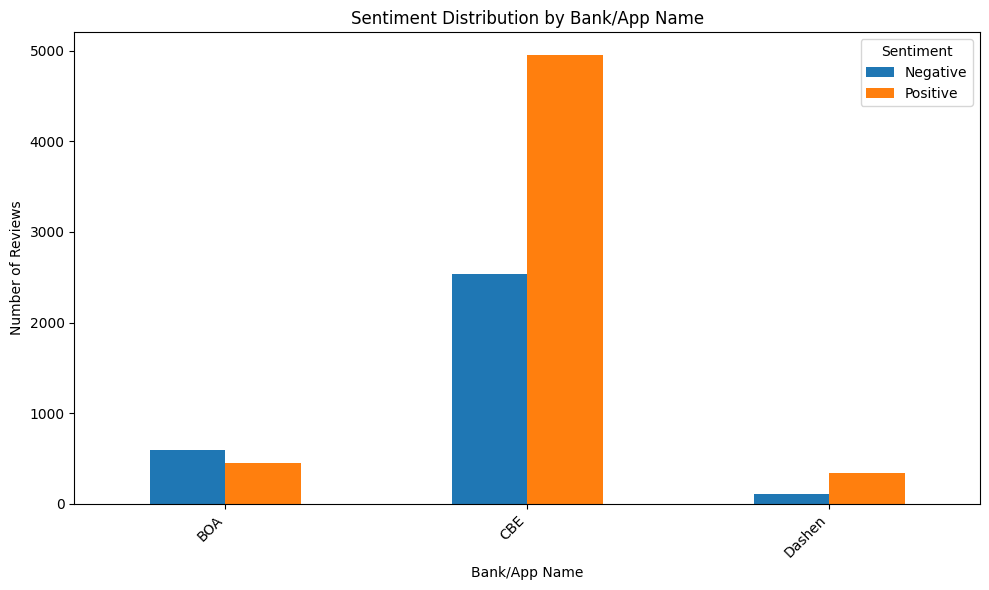

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# Load your analyzed data (assuming you are in 03_data_visualization.ipynb or similar)
processed_data_dir = os.path.join(os.path.abspath(''), os.pardir, 'data', 'processed')
input_filepath = os.path.join(processed_data_dir, 'fintech_app_reviews_analyzed.csv')

if not os.path.exists(input_filepath):
    print(f"Error: Analyzed data file not found at {input_filepath}. Please run 02_sentiment_thematic_analysis.ipynb first.")
else:
    df_analyzed = pd.read_csv(input_filepath)
    print(f"Loaded {len(df_analyzed)} analyzed reviews from {input_filepath}")

    # Create the plot
    plt.figure(figsize=(10, 6))
    df_analyzed.groupby('Bank/App Name')['Sentiment'].value_counts().unstack(fill_value=0).plot(kind='bar', stacked=False, ax=plt.gca())

    plt.title('Sentiment Distribution by Bank/App Name')
    plt.xlabel('Bank/App Name')
    plt.ylabel('Number of Reviews')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
    plt.legend(title='Sentiment')
    plt.tight_layout() # Adjust layout to prevent labels from being cut off
    plt.show()

Ensured output directory exists: d:\10academy\10acadamey\week_02_challenge\output\images
Loaded 8986 analyzed reviews from d:\10academy\10acadamey\week_02_challenge\notebooks\..\data\processed\fintech_app_reviews_analyzed.csv

Note: 'Neutral' sentiment is NOT present in the loaded data from 'fintech_app_reviews_analyzed.csv'.
This is expected if you used the default Hugging Face model which is binary (Positive/Negative).
If you want 'Neutral' sentiment, consider using VADER or defining custom thresholds from sentiment scores in 02_sentiment_thematic_analysis.ipynb.

--- Plotting Proportional Sentiment Distribution by Bank/App Name ---
Plot saved to d:\10academy\10acadamey\week_02_challenge\output\images\sentiment_distribution_by_bank_proportions.png


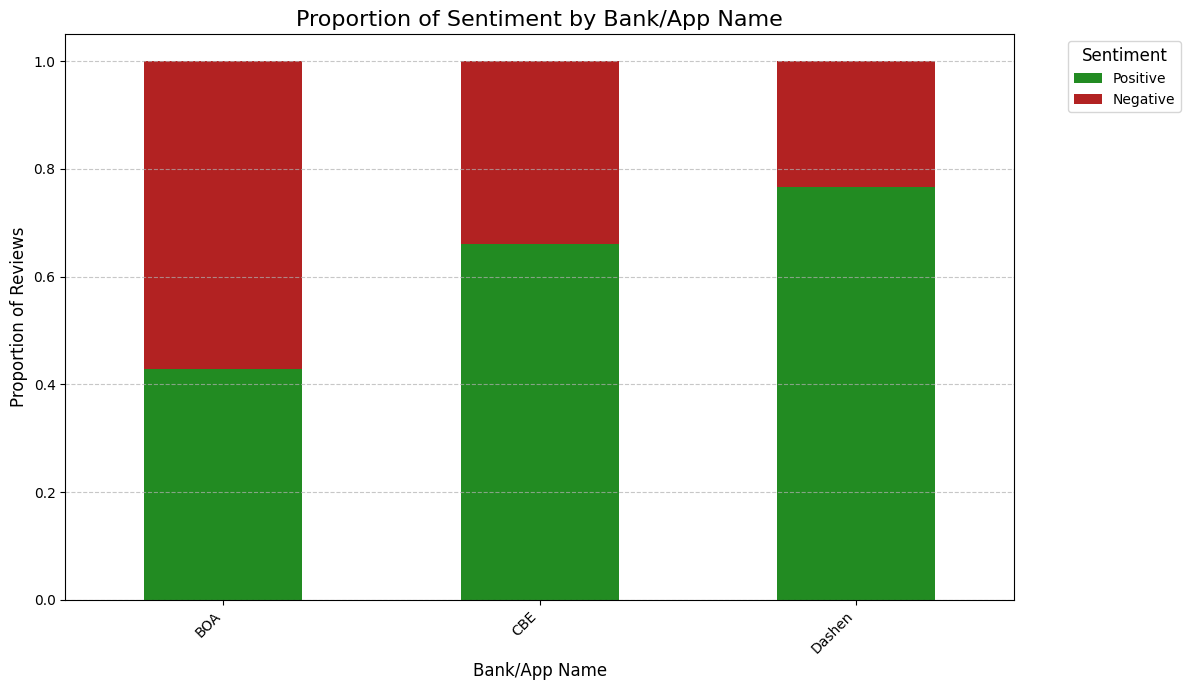


--- Plotting Absolute Sentiment Distribution by Bank/App Name ---
Plot saved to d:\10academy\10acadamey\week_02_challenge\output\images\sentiment_distribution_by_bank_counts.png


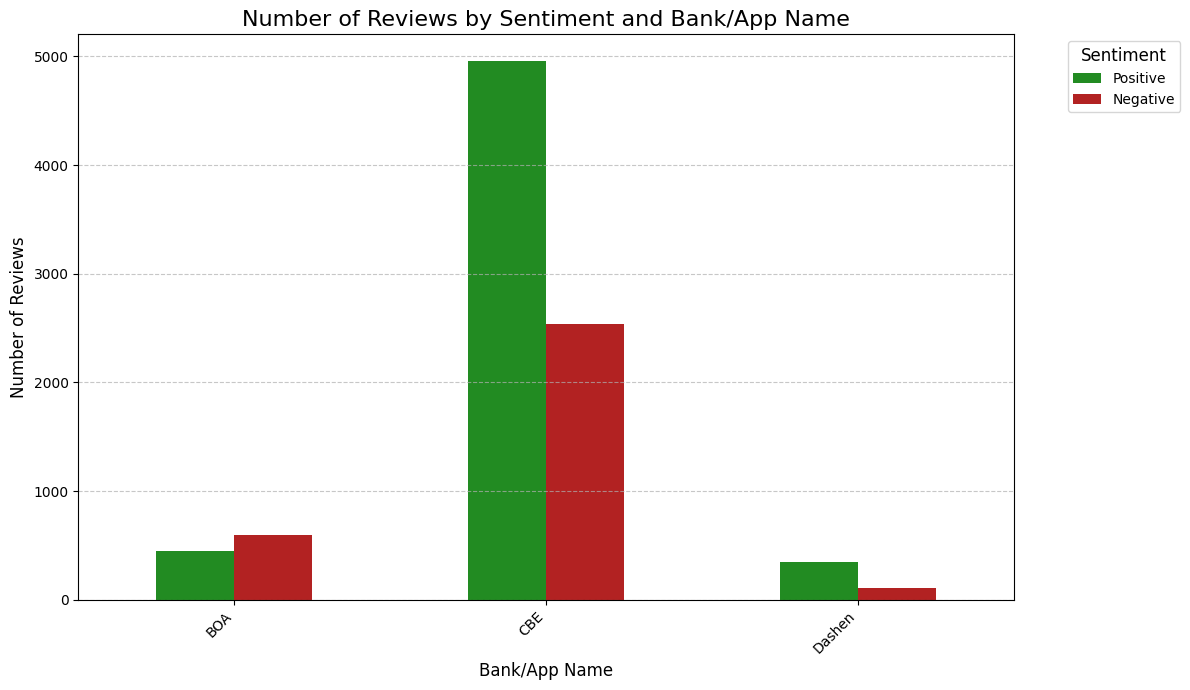

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# --- 1. Create output directory if it doesn't exist ---
output_image_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir, 'output', 'images'))
os.makedirs(output_image_dir, exist_ok=True)
print(f"Ensured output directory exists: {output_image_dir}")

# --- 2. Load your analyzed data ---
processed_data_dir = os.path.join(os.path.abspath(''), os.pardir, 'data', 'processed')
input_filepath = os.path.join(processed_data_dir, 'fintech_app_reviews_analyzed.csv')

if not os.path.exists(input_filepath):
    print(f"Error: Analyzed data file not found at {input_filepath}. Please run 02_sentiment_thematic_analysis.ipynb first.")
else:
    df_analyzed = pd.read_csv(input_filepath)
    print(f"Loaded {len(df_analyzed)} analyzed reviews from {input_filepath}")

    # Check for 'Neutral' sentiment in the loaded data
    unique_sentiments = df_analyzed['Sentiment'].unique()
    if 'Neutral' not in unique_sentiments:
        print("\nNote: 'Neutral' sentiment is NOT present in the loaded data from 'fintech_app_reviews_analyzed.csv'.")
        print("This is expected if you used the default Hugging Face model which is binary (Positive/Negative).")
        print("If you want 'Neutral' sentiment, consider using VADER or defining custom thresholds from sentiment scores in 02_sentiment_thematic_analysis.ipynb.")
        sentiment_order = ['Positive', 'Negative'] # If Neutral is not in data, stick to what's available
    else:
        sentiment_order = ['Positive', 'Negative', 'Neutral'] # Include Neutral if it's in the data

    # Define custom colors for sentiment for better visualization
    sentiment_colors = {
        'Positive': 'forestgreen',
        'Negative': 'firebrick',
        'Neutral': 'darkgoldenrod'
    }

    # Filter out any sentiments not in our desired order (e.g., if there are unexpected values)
    # This also handles cases where 'Neutral' might not be in the data
    df_plot = df_analyzed[df_analyzed['Sentiment'].isin(sentiment_order)].copy()

    # --- 3. Plot Proportional Sentiment Distribution by Bank/App Name (Stacked Bar Chart) ---
    # This is often more insightful for comparing distributions between banks

    print("\n--- Plotting Proportional Sentiment Distribution by Bank/App Name ---")

    # Calculate proportions of sentiment for each bank
    sentiment_by_bank_proportion = df_plot.groupby('Bank/App Name')['Sentiment'].value_counts(normalize=True).unstack(fill_value=0)

    # Reorder columns to ensure consistent stacking (e.g., Positive, Negative, Neutral)
    # This will add 'Neutral' column with zeros if not present, which is what you asked for.
    for s in sentiment_order:
        if s not in sentiment_by_bank_proportion.columns:
            sentiment_by_bank_proportion[s] = 0.0
    sentiment_by_bank_proportion = sentiment_by_bank_proportion[sentiment_order]

    plt.figure(figsize=(12, 7))
    ax_stacked = sentiment_by_bank_proportion.plot(
        kind='bar',
        stacked=True, # Use stacked=True for proportional bars
        ax=plt.gca(),
        color=[sentiment_colors[s] for s in sentiment_by_bank_proportion.columns]
    )

    plt.title('Proportion of Sentiment by Bank/App Name', fontsize=16)
    plt.xlabel('Bank/App Name', fontsize=12)
    plt.ylabel('Proportion of Reviews', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title='Sentiment', title_fontsize='12', fontsize='10', bbox_to_anchor=(1.05, 1), loc='upper left') # Adjust legend position
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Save the plot
    plot_filename = os.path.join(output_image_dir, 'sentiment_distribution_by_bank_proportions.png')
    plt.savefig(plot_filename)
    print(f"Plot saved to {plot_filename}")

    plt.show()

    # --- Optional: Absolute Counts Sentiment Distribution by Bank/App Name (Grouped Bar Chart) ---
    print("\n--- Plotting Absolute Sentiment Distribution by Bank/App Name ---")
    sentiment_by_bank_counts = df_plot.groupby('Bank/App Name')['Sentiment'].value_counts().unstack(fill_value=0)
    for s in sentiment_order:
        if s not in sentiment_by_bank_counts.columns:
            sentiment_by_bank_counts[s] = 0 # Add Neutral column with zeros if not present
    sentiment_by_bank_counts = sentiment_by_bank_counts[sentiment_order]


    plt.figure(figsize=(12, 7))
    ax_grouped = sentiment_by_bank_counts.plot(
        kind='bar',
        stacked=False, # Use stacked=False for grouped bars
        ax=plt.gca(),
        color=[sentiment_colors[s] for s in sentiment_by_bank_counts.columns]
    )

    plt.title('Number of Reviews by Sentiment and Bank/App Name', fontsize=16)
    plt.xlabel('Bank/App Name', fontsize=12)
    plt.ylabel('Number of Reviews', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title='Sentiment', title_fontsize='12', fontsize='10', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Save the plot
    plot_filename_grouped = os.path.join(output_image_dir, 'sentiment_distribution_by_bank_counts.png')
    plt.savefig(plot_filename_grouped)
    print(f"Plot saved to {plot_filename_grouped}")

    plt.show()

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF # Or LatentDirichletAllocation for LDA
import spacy
from nltk.corpus import stopwords
import nltk

# --- Global Setup ---
# Create output directory if it doesn't exist
output_image_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir, 'output', 'images'))
os.makedirs(output_image_dir, exist_ok=True)
print(f"Ensured output directory exists: {output_image_dir}")

# Load English model for spaCy (run 'python -m spacy download en_core_web_sm' once if not already downloaded)
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    print("SpaCy 'en_core_web_sm' model not found. Downloading...")
    spacy.cli.download("en_core_web_sm")
    nlp = spacy.load("en_core_web_sm")

# Get NLTK stopwords (download if not present)
try:
    nltk.data.find('corpora/stopwords')
except nltk.downloader.DownloadError:
    nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# --- Data Loading ---
processed_data_dir = os.path.join(os.path.abspath(''), os.pardir, 'data', 'processed')
input_filepath = os.path.join(processed_data_dir, 'fintech_app_reviews_analyzed.csv')

df_analyzed = pd.DataFrame() # Initialize empty DataFrame
if not os.path.exists(input_filepath):
    print(f"Error: Analyzed data file not found at {input_filepath}.")
    print("Please ensure '02_sentiment_thematic_analysis.ipynb' has been run successfully to create this file.")
else:
    df_analyzed = pd.read_csv(input_filepath)
    print(f"Loaded {len(df_analyzed)} analyzed reviews from {input_filepath}")
    print("Columns in df_analyzed:", df_analyzed.columns.tolist())


# --- Function for Sentiment Distribution Plotting ---
def plot_sentiment_distribution(df, output_dir):
    """
    Plots the sentiment distribution by bank/app name, both proportionally (stacked bar)
    and by absolute counts (grouped bar).
    """
    if df.empty:
        print("DataFrame is empty. Skipping sentiment distribution plots.")
        return

    # Check for 'Sentiment' column
    if 'Sentiment' not in df.columns:
        print("Error: 'Sentiment' column not found in DataFrame. Skipping sentiment distribution plots.")
        return

    # Check for 'Neutral' sentiment in the loaded data
    unique_sentiments = df['Sentiment'].unique()
    sentiment_order = ['Positive', 'Negative'] # Default order if Neutral is not present
    if 'Neutral' not in unique_sentiments:
        print("\nNote: 'Neutral' sentiment is NOT present in the loaded data from 'fintech_app_reviews_analyzed.csv'.")
        print("This is expected if you used a binary sentiment model (Positive/Negative).")
        print("If you want 'Neutral' sentiment, consider using VADER or defining custom thresholds from sentiment scores in 02_sentiment_thematic_analysis.ipynb.")
    else:
        sentiment_order = ['Positive', 'Negative', 'Neutral'] # Include Neutral if it's in the data

    # Define custom colors for sentiment for better visualization
    sentiment_colors = {
        'Positive': 'forestgreen',
        'Negative': 'firebrick',
        'Neutral': 'darkgoldenrod'
    }

    # Filter out any sentiments not in our desired order (e.g., if there are unexpected values)
    df_plot = df[df['Sentiment'].isin(sentiment_order)].copy()

    # --- Plot Proportional Sentiment Distribution (Stacked Bar Chart) ---
    print("\n--- Plotting Proportional Sentiment Distribution by Bank/App Name ---")

    sentiment_by_bank_proportion = df_plot.groupby('Bank/App Name')['Sentiment'].value_counts(normalize=True).unstack(fill_value=0)

    # Reorder columns to ensure consistent stacking (e.g., Positive, Negative, Neutral)
    for s in sentiment_order:
        if s not in sentiment_by_bank_proportion.columns:
            sentiment_by_bank_proportion[s] = 0.0
    sentiment_by_bank_proportion = sentiment_by_bank_proportion[sentiment_order]

    plt.figure(figsize=(12, 7))
    sentiment_by_bank_proportion.plot(
        kind='bar',
        stacked=True,
        ax=plt.gca(),
        color=[sentiment_colors[s] for s in sentiment_by_bank_proportion.columns]
    )

    plt.title('Proportion of Sentiment by Bank/App Name', fontsize=16)
    plt.xlabel('Bank/App Name', fontsize=12)
    plt.ylabel('Proportion of Reviews', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title='Sentiment', title_fontsize='12', fontsize='10', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    plot_filename = os.path.join(output_dir, 'sentiment_distribution_by_bank_proportions.png')
    plt.savefig(plot_filename)
    print(f"Plot saved to {plot_filename}")
    plt.close() # Close plot to free memory
    # plt.show() # Uncomment if you want to see it in the notebook immediately

    # --- Plot Absolute Counts Sentiment Distribution (Grouped Bar Chart) ---
    print("\n--- Plotting Absolute Sentiment Distribution by Bank/App Name ---")
    sentiment_by_bank_counts = df_plot.groupby('Bank/App Name')['Sentiment'].value_counts().unstack(fill_value=0)
    for s in sentiment_order:
        if s not in sentiment_by_bank_counts.columns:
            sentiment_by_bank_counts[s] = 0
    sentiment_by_bank_counts = sentiment_by_bank_counts[sentiment_order]

    plt.figure(figsize=(12, 7))
    sentiment_by_bank_counts.plot(
        kind='bar',
        stacked=False,
        ax=plt.gca(),
        color=[sentiment_colors[s] for s in sentiment_by_bank_counts.columns]
    )

    plt.title('Number of Reviews by Sentiment and Bank/App Name', fontsize=16)
    plt.xlabel('Bank/App Name', fontsize=12)
    plt.ylabel('Number of Reviews', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title='Sentiment', title_fontsize='12', fontsize='10', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    plot_filename_grouped = os.path.join(output_dir, 'sentiment_distribution_by_bank_counts.png')
    plt.savefig(plot_filename_grouped)
    print(f"Plot saved to {plot_filename_grouped}")
    plt.close() # Close plot to free memory
    # plt.show() # Uncomment if you want to see it in the notebook immediately


# --- Function for Topic Modeling and Visualization ---
def preprocess_text_for_topic_modeling(text):
    """
    Cleans text for topic modeling: lowercasing, lemmatization,
    removes non-alpha, stopwords, and short words.
    """
    if not isinstance(text, str):
        return ""
    doc = nlp(text.lower())
    tokens = [
        token.lemma_ for token in doc
        if token.text.isalpha() and token.lemma_ not in stop_words and len(token.lemma_) > 2
    ]
    return " ".join(tokens)

def plot_topic_themes(df, bank_name, review_column_name, output_dir, n_topics=5, n_top_words=10):
    """
    Performs topic modeling (NMF) and visualizes top keywords for a specific bank.
    """
    if df.empty:
        print(f"DataFrame is empty. Skipping topic modeling for {bank_name}.")
        return

    if 'Bank/App Name' not in df.columns or bank_name not in df['Bank/App Name'].unique():
        print(f"DataFrame does not contain 'Bank/App Name' column or '{bank_name}' reviews. Skipping topic modeling.")
        return

    print(f"\n--- Performing Topic Modeling for {bank_name} Reviews ---")
    bank_reviews_df = df[df['Bank/App Name'] == bank_name].copy()

    if review_column_name not in bank_reviews_df.columns:
        print(f"Error: The column '{review_column_name}' was not found in the DataFrame for {bank_name}. Skipping topic modeling.")
        print("Please check your CSV file for the correct review text column name.")
        return

    bank_reviews_df['clean_review'] = bank_reviews_df[review_column_name].apply(preprocess_text_for_topic_modeling)
    bank_reviews_clean = bank_reviews_df[bank_reviews_df['clean_review'].str.strip() != ''].copy()

    if bank_reviews_clean.empty:
        print(f"No cleaned {bank_name} reviews available for topic modeling after preprocessing. Skipping topic modeling.")
        return

    # Vectorization (TF-IDF)
    # Ensure there's enough data for TF-IDF to find features (min_df=5, so need at least 5 documents)
    if len(bank_reviews_clean) < 5:
        print(f"Not enough cleaned reviews ({len(bank_reviews_clean)}) for {bank_name} to perform TF-IDF with min_df=5. Skipping topic modeling.")
        return

    vectorizer = TfidfVectorizer(max_features=1000, max_df=0.85, min_df=5, ngram_range=(1, 2))
    try:
        tfidf_matrix = vectorizer.fit_transform(bank_reviews_clean['clean_review'])
    except ValueError as e:
        print(f"Error during TF-IDF vectorization for {bank_name}: {e}. This often happens if no vocabulary can be formed (e.g., all documents are empty or too short). Skipping topic modeling.")
        return

    feature_names = vectorizer.get_feature_names_out()

    if tfidf_matrix.shape[1] == 0: # Check if any features were extracted
        print(f"No features (words/n-grams) extracted for {bank_name} after TF-IDF. Skipping topic modeling.")
        return

    # Topic Modeling (NMF)
    # Ensure n_topics is not greater than the number of features or documents
    n_topics_adjusted = min(n_topics, tfidf_matrix.shape[1], tfidf_matrix.shape[0])
    if n_topics_adjusted == 0:
        print(f"Cannot form topics for {bank_name} as adjusted n_topics is 0. Skipping topic modeling.")
        return
    elif n_topics_adjusted < n_topics:
        print(f"Adjusting n_topics for {bank_name} from {n_topics} to {n_topics_adjusted} due to data limitations.")


    nmf_model = NMF(n_components=n_topics_adjusted, random_state=42, init='nndsvda', tol=1e-4)
    try:
        nmf_model.fit(tfidf_matrix)
    except Exception as e:
        print(f"Error fitting NMF model for {bank_name}: {e}. Skipping topic modeling.")
        return

    # Extract and Visualize Top Keywords for Each Topic
    fig, axes = plt.subplots(1, n_topics_adjusted, figsize=(3 * n_topics_adjusted, 8), sharex=True)
    fig.suptitle(f'{bank_name} Review Themes', fontsize=18, y=1.02) # Now correctly includes bank name in title

    # Ensure axes is iterable even if only one topic
    if n_topics_adjusted == 1:
        axes = [axes] # Make it a list so loop works

    for topic_idx, topic in enumerate(nmf_model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        # Fixed: Passed hue and legend=False to address FutureWarning
        sns.barplot(x=weights, y=top_features, ax=ax, palette='viridis', hue=top_features, legend=False)

        ax.set_title(f'Topic {topic_idx + 1}', fontsize=12)
        ax.tick_params(axis='y', labelsize=10)
        ax.tick_params(axis='x', labelsize=8)
        # Removed ax.set_xlabel('') to ensure x-axis labels (weights) are visible.
        ax.invert_yaxis()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    plot_filename = os.path.join(output_dir, f'{bank_name.lower().replace(" ", "_")}_review_themes.png')
    plt.savefig(plot_filename)
    print(f"Topic visualization saved to {plot_filename}")
    plt.close() # Close plot to free memory
    # plt.show() # Uncomment if you want to see it in the notebook immediately


# --- Main Execution ---
if not df_analyzed.empty:
    # --- Execute Sentiment Plotting ---
    plot_sentiment_distribution(df_analyzed, output_image_dir)

    # --- Execute Topic Modeling Plotting for all banks ---
    # Based on your column list: ['reviewId', 'User Name', 'Rating', 'Date', 'Review Text', 'Bank/App Name', 'Source', 'Sentiment', 'Sentiment_Score', 'Processed_Reviews_Tokens', 'Extracted_Keywords', 'Identified_Theme']
    # The correct column for review text is 'Review Text'.
    review_text_column = 'Review Text' # This is now correctly set based on your data.

    if 'Bank/App Name' in df_analyzed.columns:
        unique_banks = df_analyzed['Bank/App Name'].unique()
        for bank in unique_banks:
            plot_topic_themes(df_analyzed, bank_name=bank, review_column_name=review_text_column, output_dir=output_image_dir)
    else:
        print("Column 'Bank/App Name' not found in DataFrame. Cannot generate topic themes by bank.")

else:
    print("No analyzed data available. Skipping all plotting operations.")

Ensured output directory exists: d:\10academy\10acadamey\week_02_challenge\output\images
Loaded 8986 analyzed reviews from d:\10academy\10acadamey\week_02_challenge\notebooks\..\data\processed\fintech_app_reviews_analyzed.csv
Columns in df_analyzed: ['reviewId', 'User Name', 'Rating', 'Date', 'Review Text', 'Bank/App Name', 'Source', 'Sentiment', 'Sentiment_Score', 'Processed_Reviews_Tokens', 'Extracted_Keywords', 'Identified_Theme']

Note: 'Neutral' sentiment is NOT present in the loaded data from 'fintech_app_reviews_analyzed.csv'.
This is expected if you used a binary sentiment model (Positive/Negative).
If you want 'Neutral' sentiment, consider using VADER or defining custom thresholds from sentiment scores in 02_sentiment_thematic_analysis.ipynb.

--- Plotting Proportional Sentiment Distribution by Bank/App Name ---
Plot saved to d:\10academy\10acadamey\week_02_challenge\output\images\sentiment_distribution_by_bank_proportions.png

--- Plotting Absolute Sentiment Distribution by B

In [19]:
print("Columns in df_analyzed:", df_analyzed.columns.tolist())

Columns in df_analyzed: ['reviewId', 'User Name', 'Rating', 'Date', 'Review Text', 'Bank/App Name', 'Source', 'Sentiment', 'Sentiment_Score', 'Processed_Reviews_Tokens', 'Extracted_Keywords', 'Identified_Theme']
